UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

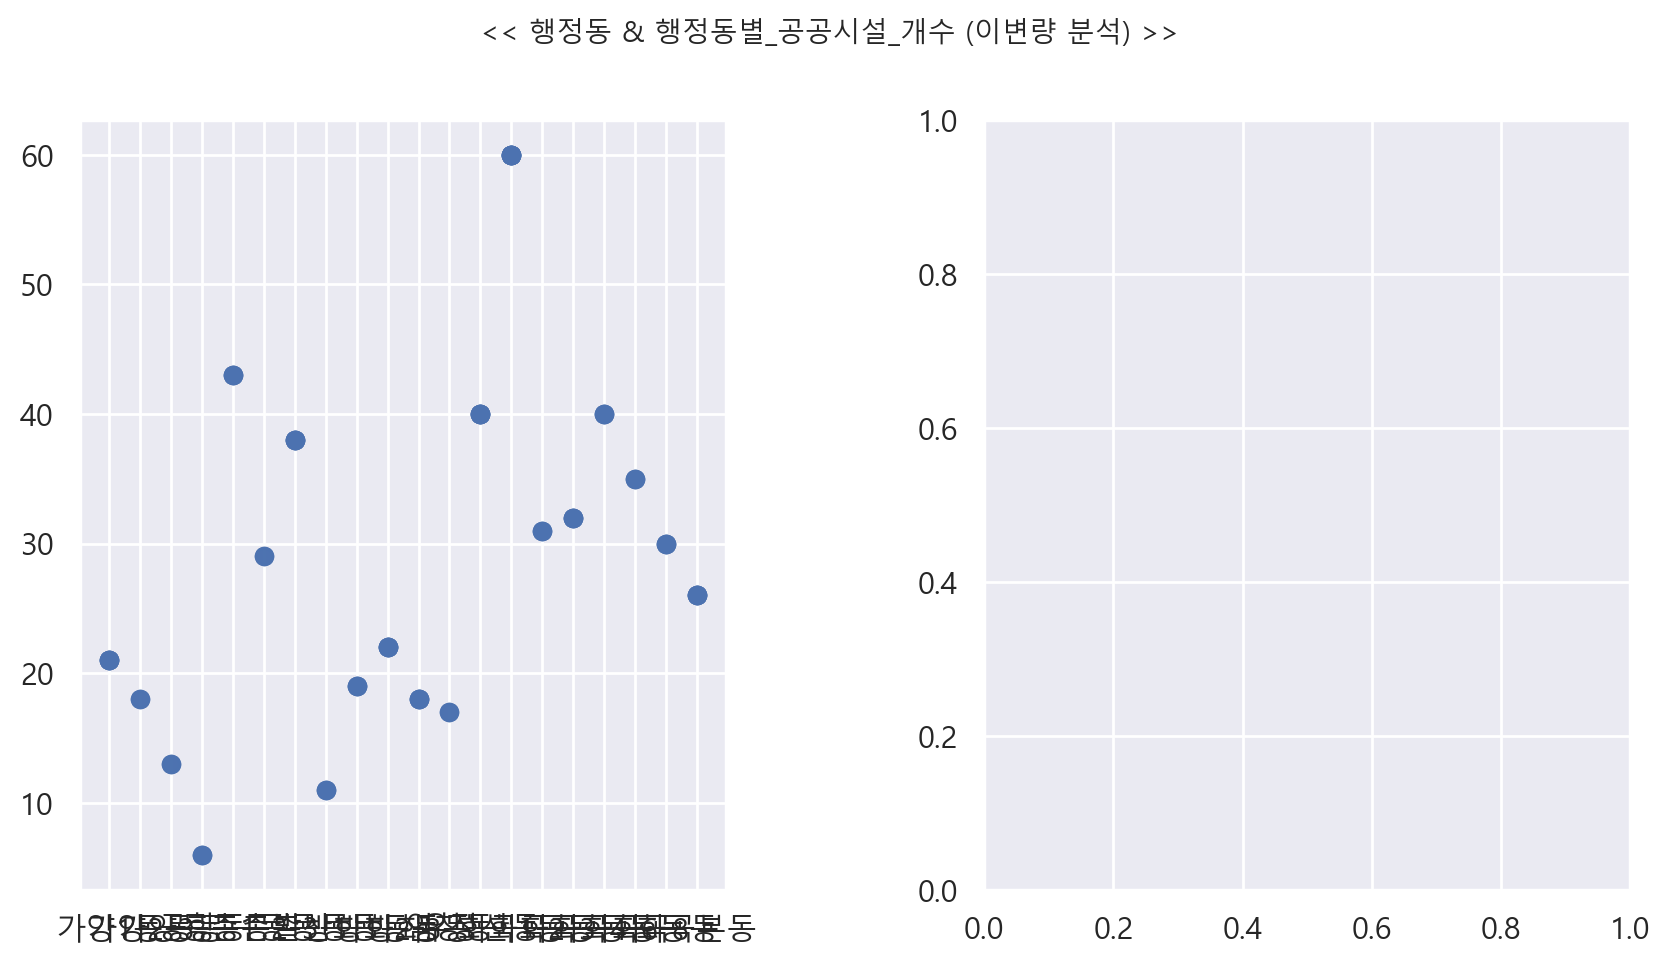

In [3]:
import numpy as np
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split

from sklearn import impute
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, f_oneway, pearsonr, chi2_contingency
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'


df2 = pd.read_csv('../../data/종합데이터.csv')


df2.columns = ['행정동', '행정동별_공공시설_개수', '행정동별_노인복지시설_개수', '행정동별_치안시설_개수', '행정동별_영유아시설_개수',
       '행정동별_운동시설_개수', '행정동별_의료시설_개수', '행정동별_공원_개수', 'PARK_SN', '공원명', '면적',
       '공공시설_개수', '노인및사회복지시설_개수', '문화및집회시설_개수', '영유아시설_개수', '운동시설_개수',
       '의료시설_개수', '의원_개수', '제1종근린생활시설_개수', '제2종근린생활시설_개수', '주거_개수', '주차장_개수',
       '치안안전시설_개수', '판매및영업시설_개수', '학군_개수', '화장실_개수', '행정동 인구 (명)',
       '행정동 면적 (㎢)', '행정동 인구밀도 (명/㎢)', '행정동_고령인구수', '행정동_고령인구비율',
       '행정동_고령인구밀도']



def numerical_analysis(df, x, y):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    plt.suptitle(f'<< {x} & {y} (이변량 분석) >>', size=10)
    plt.subplots_adjust(wspace=0.4)
    
    sns.regplot(x=x, y=y, data=df, ax=axes[0])
    
    sns.kdeplot(x=df[x], y=df[y], shade=True, ax=axes[1])

    result = pearsonr(x=df[x], y=df[y])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')
    
    plt.show()

x = '행정동'
y = '행정동별_공공시설_개수'
    
numerical_analysis(df2, x, y)